In [43]:
# Dependencies 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
#  loading files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# reading the data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# reading the data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [5]:
city_data_df.count()
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Urban")

66

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [12]:
#merging
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on= ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# dataframe for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [14]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [15]:
# number of rides for each city in specific type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [16]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]


In [17]:
# Average fare for city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [18]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [19]:
# average driver count
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12
Barajasview            26
Carriemouth            52
Christopherfurt        41
Deanville              49
                       ..
West Patrickchester    25
West Robert            39
West Samuelburgh       73
Williamsstad           59
Williamsview           46
Name: driver_count, Length: 66, dtype: int64

In [20]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

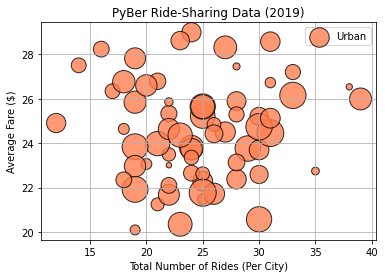

In [21]:
# bubble chart
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, c= "coral", edgecolor = "black", linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

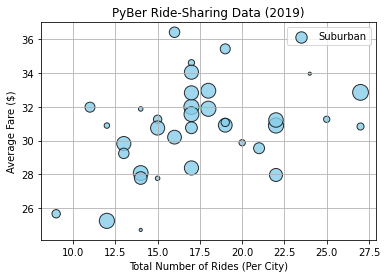

In [22]:
# suburban bubble chart
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, c= "skyblue", edgecolor = "black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

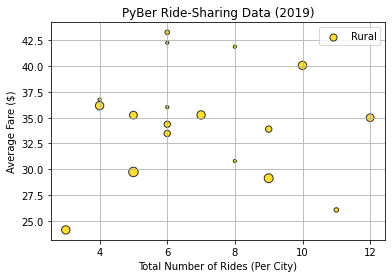

In [23]:
# rural 
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, c= "gold", edgecolor = "black", linewidths=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

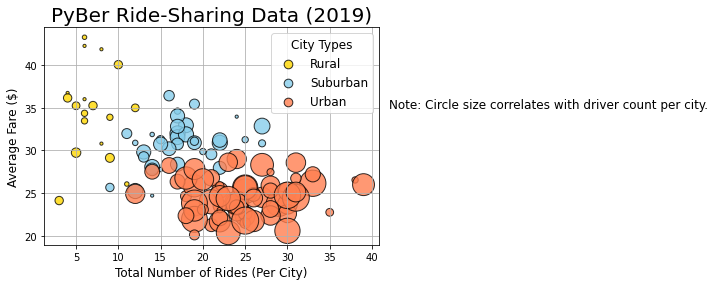

In [24]:
# bubble chart for all 
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, c= "gold", edgecolor = "black", linewidths=1, alpha=0.8, label="Rural")
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, c= "skyblue", edgecolor = "black", linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, c= "coral", edgecolor = "black", linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
#formatted legend
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.savefig("analysis/Fig1.png")

In [31]:
# summary stat 
urban_cities_df.describe()
rural_cities_df.describe()
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [37]:
# summary stat on rides
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [38]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [39]:
# mean of ride counts
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2), 

(24.62, 17.36, 6.94)

In [40]:
# median of rides
round(urban_ride_count.median(), 2),round(suburban_ride_count.median(), 2),round(rural_ride_count.median(), 2),

(24.0, 17.0, 6.0)

In [41]:
# mode for ride counts by city type
(urban_ride_count.mode()), (suburban_ride_count.mode()),(rural_ride_count.mode()),

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [55]:
# central tendency
mean_urban_ride_count = round(np.mean(urban_ride_count), 3)
print(f"The mean for urban ride count is {mean_urban_ride_count}")
median_urban_ride_count = round(np.median(urban_ride_count), 3)
print(f"The median for urban ride count is {median_urban_ride_count}")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for urban ride count is {mode_urban_ride_count}")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for suburban ride count is {mode_suburban_ride_count}")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for rural ride count is {mode_rural_ride_count}")

The mean for urban ride count is 24.621
The median for urban ride count is 24.0
The mode for urban ride count is ModeResult(mode=array([22], dtype=int64), count=array([7]))
The mode for suburban ride count is ModeResult(mode=array([17], dtype=int64), count=array([7]))
The mode for rural ride count is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [57]:
# getting fare data for each city type
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [60]:
# central tendency for urban fares
round(urban_fares.mean(), 2), urban_fares.median(), urban_fares.mode()

(24.53,
 24.64,
 0    22.86
 dtype: float64)

In [65]:
# central tendency for fare data all city types
mean_urban_fares = round(urban_fares.mean(), 2), 
print(f"The mean urban ride fare is {mean_urban_fares}")
median_urban_fares = round(urban_fares.median(), 2), 
print(f"The median urban ride fare is {median_urban_fares}")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode for urban fare is {mode_urban_fares}")


mean_suburban_fares = round(suburban_fares.mean(), 2), 
print(f"The mean suburban ride fare is {mean_suburban_fares}")
median_suburban_fares = round(suburban_fares.median(), 2), 
print(f"The median suburban ride fare is {median_suburban_fares}")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode for suburban fare is {mode_suburban_fares}")

mean_rural_fares = round(rural_fares.mean(), 2), 
print(f"The mean rural ride fare is {mean_rural_fares}")
median_rural_fares = round(rural_fares.median(), 2), 
print(f"The rural ride fare is {median_rural_fares}")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode for rural fare is {mode_rural_fares}")

The mean urban ride fare is (24.53,)
The median urban ride fare is (24.64,)
The mode for urban fare is ModeResult(mode=array([22.86]), count=array([5]))
The mean suburban ride fare is (30.97,)
The median suburban ride fare is (30.75,)
The mode for suburban fare is ModeResult(mode=array([17.99]), count=array([3]))
The mean rural ride fare is (34.62,)
The rural ride fare is (37.05,)
The mode for rural fare is ModeResult(mode=array([37.05]), count=array([2]))


In [67]:
# Get the driver count data .
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [71]:
# central tendency for driver data all city types
mean_urban_drivers = round(urban_drivers.mean(), 2), 
print(f"The mean urban driver count {mean_urban_drivers}")
median_urban_drivers = round(urban_drivers.median(), 2), 
print(f"The median urban driver count is {median_urban_drivers}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for urban driver count is {mode_urban_drivers}")


mean_suburban_drivers = round(suburban_drivers.mean(), 2), 
print(f"The mean suburban driver count {mean_suburban_drivers}")
median_suburban_drivers = round(urban_drivers.median(), 2), 
print(f"The median suburban driver count is {median_suburban_drivers}")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for suburban driver count is {mode_suburban_drivers}")

mean_rural_drivers = round(rural_drivers.mean(), 2), 
print(f"The mean rural driver count {mean_rural_drivers}")
median_rural_drivers = round(rural_drivers.median(), 2), 
print(f"The median rural driver count is {median_rural_drivers}")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for rural driver count is {mode_rural_drivers}")

The mean urban driver count (36.68,)
The median urban driver count is (37.0,)
The mode for urban driver count is ModeResult(mode=array([39], dtype=int64), count=array([86]))
The mean suburban driver count (13.71,)
The median suburban driver count is (37.0,)
The mode for suburban driver count is ModeResult(mode=array([20], dtype=int64), count=array([79]))
The mean rural driver count (4.3,)
The median rural driver count is (4.0,)
The mode for rural driver count is ModeResult(mode=array([1], dtype=int64), count=array([32]))


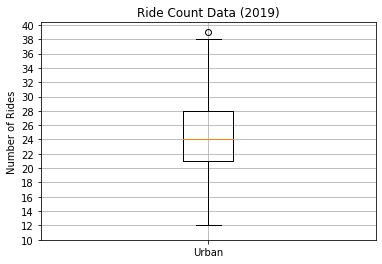

In [72]:
# Create a box-and-whisker plot for the urban cities ride count.
#URBAN
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

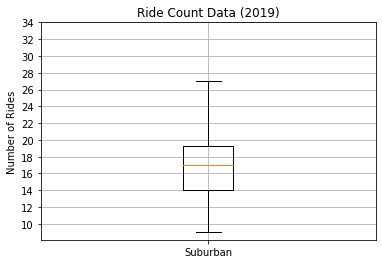

In [75]:
# Create a box-and-whisker plot for the urban cities ride count.
#SUBURBAN
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 36, step=2.0))
ax.grid()
plt.show()

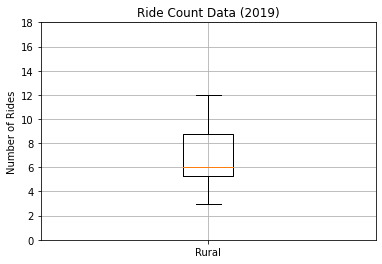

In [77]:
# Create a box-and-whisker plot for the urban cities ride count.
#RURAL
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 20, step=2.0))
ax.grid()
plt.show()

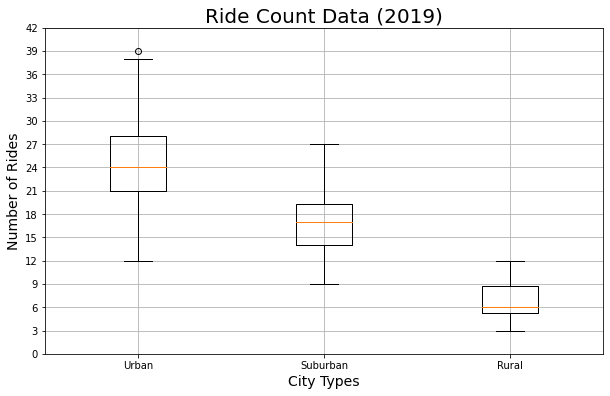

In [78]:
# Add ALL ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [83]:
# getting city with the highest ride count
urban_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_outlier} has the highest ride count.")

West Angela has the highest ride count.


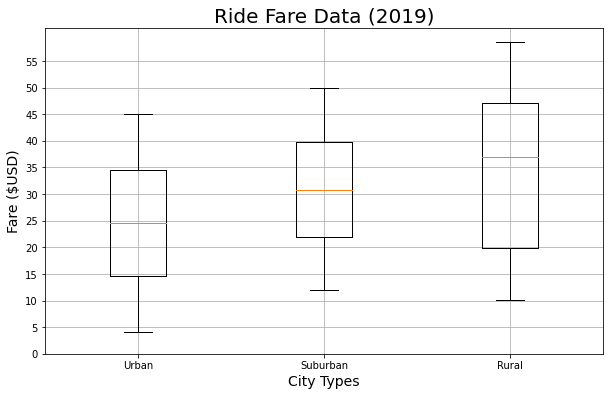

In [94]:
# Add ALL ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()


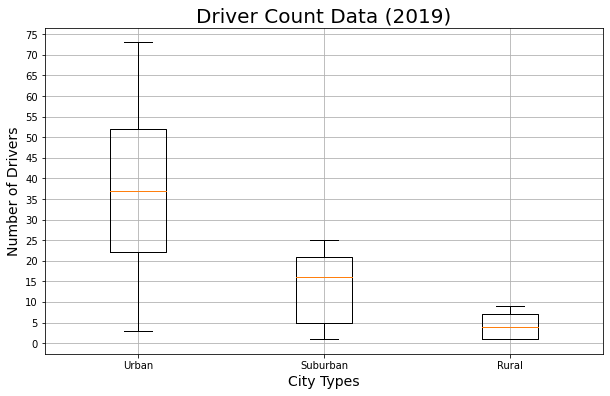

In [97]:
# box-and-whisker for Driver count data 
# Add ALL ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()